In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('C://Users//hashamkhan//Documents//Python Scripts//')

#Reading in data and assigning headers
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(filename, names=headers)

#Print top 50 and bottom 50 rows of the dataframe and store it as a csv. Determine missing values characterization.
roughSample=pd.concat([df.head(50), df.tail(50)], ignore_index=True).to_csv('RoughSampleData.csv')


In [128]:
#In this df, missing values are stored as '?'
c = (df == '?').sum(axis=0)
c

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [134]:
#Replacing special cahracters for missing values with nan
df.replace('?', np.nan, inplace=True)

#Shape of dataframe
df.shape
# (205, 26)

#Determine type of variables and store it as a csv for analysis
df.dtypes.to_csv('DataTypes.csv')

#Determine summary stats for all variables and store it as a csv for analysis
df.describe(include='all').to_csv('SummaryStats.csv')


In [ ]:
#Normalization of variables. There are three methods but really depends on requirement. Keeping it optional.
#Simple feature scaling
df["colname"]=df["colname"]/df["colname"].max()

#Min-max Scaling
df["colname"]=df["colname"]-df["colname"].min()/(df["colname"].max()-df["colname"].min())

#z-score Scaling
df["colname"]=df["colname"]-df["colname"].mean()/df["colname"].std()

In [130]:
#Binning dataset for any descriptive analysis
bins = np.linspace(min(df["colname"]), max(df["colname"]), 4)
group_names = ["Low", "Medium", "High"]
df["colname"] = pd.cut(df["colname"], bins, labels=group_names, include_lowest=True)


KeyError: 'colname'

In [143]:
df["price"]=df.price.astype(float)

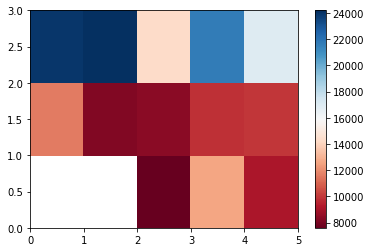

In [152]:
#Creating groups/pivot/heatmap for different categorical variables 
df_test=df[["drive-wheels", "body-style", "price"]]
df_grp=df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()
df_pivot=df_grp.pivot(index="drive-wheels", columns="body-style")

#Visualizing pivot using heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [158]:
#ANOVA test using F-test. This helps us determine correlation between variables if we get high F score and small p value.
import scipy as stats
df_anova=df[["make", "price"]]
grouped_anova=df_anova.groupby(["make"])
anova_results_1=stats.f_oneway(grouped_anova("honda")["price"], grouped_anova.get_group("subaru")["price"])


AttributeError: module 'scipy' has no attribute 'f_oneway'

C:\Users\hashamkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


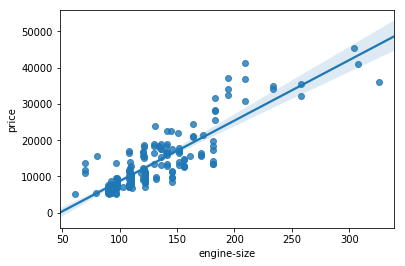

In [168]:
#Correlation
#Visualizing correlation between two features(engine size and price). This is helpful in the early
#stage of analysis where we want to identify predictors that are highly correlated with target.
import seaborn as sns
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)


In [169]:
#Strength of Correlation
#Pearson correlation coefficient and p-value are helpful to determine the strength of correlation between two features
# 0 < correlation <= 1 ----> large +ve relationship
# -1 <= correlation < 0 -----> large -ve relationship
# correlation = 0 ----> no relationship

# p-value < 0.001 strong certainity in the result
# p-value < 0.05 moderate certainity
# p-value < 0.1 weak certainity
# p-value > 0.1 no certainity

#Example- Finding correlation between horsepower and price.

pearson_coef, p_value=stats.pearsonr(df['horsepower'], df['price'])


AttributeError: module 'scipy' has no attribute 'pearsonr'

In [74]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())

symboling
False    205
Name: symboling, dtype: int64
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
make
False    205
Name: make, dtype: int64
fuel-type
False    205
Name: fuel-type, dtype: int64
aspiration
False    205
Name: aspiration, dtype: int64
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
body-style
False    205
Name: body-style, dtype: int64
drive-wheels
False    205
Name: drive-wheels, dtype: int64
engine-location
False    205
Name: engine-location, dtype: int64
wheel-base
False    205
Name: wheel-base, dtype: int64
length
False    205
Name: length, dtype: int64
width
False    205
Name: width, dtype: int64
height
False    205
Name: height, dtype: int64
curb-weight
False    205
Name: curb-weight, dtype: int64
engine-type
False    205
Name: engine-type, dtype: int64
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
engine-size
False    205
Name: engine-size, dtype: int64
fuel-system
False    205
Name: 